# Etude de l'enquête ETIC du 2nd degré

Dans cette analyse, notre objectif était d'étudier cette enquête pour pouvoir ensuite donner un score ETIC à chaque établissement pour ensuite pouvoir faire des études de ce score avec le label numérique par exemple. C'est la source de données que nous avons trouvées assez complètes qui nous donne les informations sur les moyens numériques dans ces établissements. Cette étude porte sur les lycées et les collèges.

Nous voulons mettre en place une formule qui permet de donner un score à chaque établissement en fonction des réponses fournies à l'enquéte. 
Seul problème, c'est qu'on a 80 colonnes dans cette enquête. Il est difficile donc d'utiliser une méthode pour analyser toutes ces colonnes.

Dans un premier temps, nous avons mis en place une formule dans laquelle nous avions gardé les colonnes jugés intéressantes du point de vue du numérique. Mais nous ne sommes rapidement rendu compte que rien ne justifiait nos choix et peut-être que nous avions raté des informations importantes. Nous avons aussi réalisé l'importance de mettre en place des poids car si cela se trouve il y a des colonnes qui sont fortement liés et donc ne devraient pas influencer énormément le score car une implique l'autre.

Pour pouvoir accorder des poids, nous avions choisi de faire une ACM avec les colonnes existantes. Chose qui est presque impossible à interpréter car nous avons 80 variables avec chacune au moins deux modalités.

Nous avons donc décidé de réduire le nombre de colonnes en faisant plusieurs analyses en parallèle qui nous ont permis de réduire le nombre des colonnes.
Les analyses sont les suivantes :
- analyse sur la maintenance qui nous a permis de réduire 6 colonnes en une seule
- analyse sur l'accés Web : de 7 colonnes à une seule
- analyse sur les services numériques : de 9 colonnes à 1 colonne
- analyse sur les ressources numériques mises à disposition :  de 7 colonnes à 1 colonne
- analyse sur les terminaux : de 15 colonnes à 1 colonne
- analyse sur le bon usage de Internet (Charte Web) : de 9 colonnes à 1 seule colonne

Ces études en détails nous ont permis de réduire le nombre de colonnes de 47 colonnes.
Vous pouvez trouver ces études dans les différents notebook pour plus de détails.

Il ne nous reste qu'à supprimer les colonnes que nous jugeons pas intéressantes et ensuite procéder à une ACM pour pouvoir analyser et accorder à chaque colonne un poids. De cette façon, nous pourrons établir une formule pour le poids et accorder un score ETIC à chaque établissement.


### *Import des librairies*



In [516]:
import pandas as pd
import plotly.express as px
import prince as pc

## *ETL*
### Import des fichiers

In [517]:
#import du fichier principal
df = pd.read_csv('../data/lycee-college/fr-en-etic_2d.csv', sep=';', index_col=0)

#On garde les données les plus récentes pour éviter des duplicats
df = df.loc[df['Millesime'] == 2019]

# import des fichiers de données des analyses
df_charte = pd.read_csv('../data/analyses/charte_num.csv', sep=';', index_col=0)
df_acc_web = pd.read_csv('../data/analyses/acces_web.csv', sep=';', index_col=0)
df_termin = pd.read_csv('../data/analyses/terminaux_num.csv', sep=';', index_col=0)
df_services = pd.read_csv('../data/analyses/services_num.csv', sep=';', index_col=0)
df_acc_ressources = pd.read_csv('../data/analyses/acces_ressources.csv', sep=';', index_col=0)
df_maint = pd.read_csv('../data/analyses/maintenance.csv', sep=';', index_col=0)

### Transformation des données

On va principalement supprimer les colonnes inutiles dans le dataframe principal.

In [518]:
df.columns

Index(['Millesime', 'Code_nature', 'nature_uai', 'typ_etab', 'Academie',
       'Departement', 'NbEleve', 'NbEnseignant', 'SiEtabCentreRessource',
       'SiProjetNumEcole', 'SiEntDisponible', 'SiProjEtabIntegreENT',
       'Maint_PersCollect', 'Maint_PrestaExt', 'Maint_PersonnelEducNatHsEtab',
       'Maint_PersonnelEtab', 'Maint_AutreNeSaitPas', 'Maint_Personne',
       'NbRessourceEdit', 'TpRess_ManuelNum', 'TpRess_AnimScienLogiSimu',
       'TpRess_Bdd', 'TpRess_LogiOutils', 'TpRess_OuvRef',
       'TpRess_ResEntrainement', 'TpRess_Autres', 'TpRess_aucune',
       'ServInt_NoteElev', 'ServInt_AbsElev', 'ServInt_EdtElevCls',
       'ServInt_CahierTxt', 'ServInt_DocRessPeda', 'ServInt_AgdActuEtab',
       'ServInt_PlatApp', 'ServInt_Autres', 'ServInt_aucun', 'NbTerminaux',
       'NbTablette', 'NbTablettePC', 'NbMicroMoins5', 'NbMicroPortable',
       'NbPortAffEl', 'NbPortAffEns', 'NbEleveEqASH', 'NbPosteEqASH', 'NbTBI',
       'propClassesAvecTBI', 'NbVideoProj', 'NbClassMobile', '

In [519]:
df.drop(columns=['Code_nature', 'nature_uai',
       'Maint_PersCollect', 'Maint_PrestaExt', 'Maint_PersonnelEducNatHsEtab',
       'Maint_PersonnelEtab', 'Maint_AutreNeSaitPas', 'Maint_Personne', 'TpRess_ManuelNum', 'TpRess_AnimScienLogiSimu',
       'TpRess_Bdd', 'TpRess_LogiOutils', 'TpRess_OuvRef',
       'TpRess_ResEntrainement', 'TpRess_Autres', 'TpRess_aucune',
       'ServInt_NoteElev', 'ServInt_AbsElev', 'ServInt_EdtElevCls',
       'ServInt_CahierTxt', 'ServInt_DocRessPeda', 'ServInt_AgdActuEtab',
       'ServInt_PlatApp', 'ServInt_Autres', 'ServInt_aucun', 'NbTerminaux',
       'NbTablette', 'NbTablettePC', 'NbMicroMoins5', 'NbMicroPortable',
       'NbPortAffEl', 'NbPortAffEns', 'NbEleveEqASH', 'NbPosteEqASH', 'NbTBI',
       'propClassesAvecTBI', 'NbVideoProj', 'NbClassMobile', 'NbLecteurMpx',
       'NbImpr3D', 'AccWeb_RTC', 'AccWeb_CableFibreOptique', 'AccWeb_ADSL',
       'AccWeb_AutresHautDebit', 'AccWeb_NeSaitPas', 'AccWeb_Aucun',
       'DebitWeb', 'SiWifi', 'SalleInternet',
       'SiPareFeuEtab', 'SiOuifiltrageWeb', 'ControlePosteriori',
       'SiCharteUsageWeb', 'Diffch_AnnexeeRI',
       'Diffch_DossierRentreeEnseignants', 'Diffch_CRConseilAdmin',
       'Diffch_DiffusionParents', 'Diffch_Autres', 'AccesParentCharte',
       'ElvAuthentif', 'SiEntUtilise',
       'TypeMatHandi_Tablette', 'TypeMatHandi_OrdiPort', 'TypeMatHandi_LogApp',
       'TypeMatHandi_Autre'], inplace=True)

In [520]:
print(df.columns)
df.shape

Index(['Millesime', 'typ_etab', 'Academie', 'Departement', 'NbEleve',
       'NbEnseignant', 'SiEtabCentreRessource', 'SiProjetNumEcole',
       'SiEntDisponible', 'SiProjEtabIntegreENT', 'NbRessourceEdit',
       'PostesInfoElvHorsCours', 'SiVisioConferenc', 'Code_region',
       'Libelle_region'],
      dtype='object')


(442, 15)

In [521]:
df.head()

,Millesime,typ_etab,Academie,Departement,NbEleve,NbEnseignant,SiEtabCentreRessource,SiProjetNumEcole,SiEntDisponible,SiProjEtabIntegreENT,NbRessourceEdit,PostesInfoElvHorsCours,SiVisioConferenc,Code_region,Libelle_region
Code_UAI,,,,,,,,,,,,,,,
0810016C,2019,P,TOULOUSE,TARN,311.0,38.0,non,oui,NaN,oui,10a19,5.0,non,76,Occitanie
0810026N,2019,C,TOULOUSE,TARN,379.0,27.0,non,oui,NaN,oui,NaN,10.0,non,76,Occitanie
0810041E,2019,C,TOULOUSE,TARN,683.0,44.0,non,oui,NaN,oui,5a9,15.0,non,76,Occitanie
0810124V,2019,C,TOULOUSE,TARN,632.0,38.0,oui,oui,NaN,oui,5a9,15.0,non,76,Occitanie
0810125W,2019,C,TOULOUSE,TARN,814.0,65.0,non,oui,NaN,oui,1a4,19.0,non,76,Occitanie


On cherche pour chaque colonne le nombre de `NaN`. Si ce nombre est trop important, il vaut mieux supprimer la colonne de notre analyse pour avoir un maximum d'établissements pour lesquels nous pourrons établir un score.

In [522]:
for col in df.columns:
    print(col, df[col].isna().sum())

Millesime 0
typ_etab 0
Academie 0
Departement 0
NbEleve 0
NbEnseignant 0
SiEtabCentreRessource 2
SiProjetNumEcole 2
SiEntDisponible 442
SiProjEtabIntegreENT 3
NbRessourceEdit 41
PostesInfoElvHorsCours 18
SiVisioConferenc 17
Code_region 0
Libelle_region 0


On voit qu'on a 446 valeurs `NaN` sur 917 valeurs pour la colonne `SiEntDisponible`, ce qui est énorme. On ne pourra pas utiliser cette colonne pour notre étude, du coup on va la supprimer. On voit également que pour la colonne `NbRessourceEdit` nous avons 93 valeurs `NaN`, ce qui donne environ 10 % des établissements. On va supprimer également cette colonne. On fait le choix de garder les colonnes `SiVisioConferenc` et `PostesInfoElvHorsCours` car le nombre de valeurs `NaN` vaut environ 38, soit 4% approximativement. Ces colonnes sont importantes car elles donnent beaucoup d'information.

In [523]:
df.drop(columns=['SiEntDisponible', 'NbRessourceEdit'], inplace=True)

df.dropna(inplace=True)

print(df.columns)
df.shape

Index(['Millesime', 'typ_etab', 'Academie', 'Departement', 'NbEleve',
       'NbEnseignant', 'SiEtabCentreRessource', 'SiProjetNumEcole',
       'SiProjEtabIntegreENT', 'PostesInfoElvHorsCours', 'SiVisioConferenc',
       'Code_region', 'Libelle_region'],
      dtype='object')


(411, 13)

Nous avons perdu 65 établissements, mais cela était nécessaire car sinon on ne pourra faire nos analyses.

On va maintenant garder seulement les colonnes qui vont nous servir pour pouvoir faire l'ACM et déterminer les liaisons existantes entre nos différentes variables et corriger la formule du score ETIC.

In [524]:
df_analyse = df.copy()

df_analyse.drop(columns=['Millesime', 'typ_etab', 'Academie', 'Departement', 'NbEleve',
       'NbEnseignant', 'Code_region', 'Libelle_region'], inplace=True)

df_analyse.columns

Index(['SiEtabCentreRessource', 'SiProjetNumEcole', 'SiProjEtabIntegreENT',
       'PostesInfoElvHorsCours', 'SiVisioConferenc'],
      dtype='object')

On va renommer maintenant les colonnes

In [525]:
for col in df_analyse.columns:
    df_analyse.rename(columns={col : col.lower()}, inplace=True)

df_analyse.columns

Index(['sietabcentreressource', 'siprojetnumecole', 'siprojetabintegreent',
       'postesinfoelvhorscours', 'sivisioconferenc'],
      dtype='object')

On peut maintenant joindre à nos autres données pour procéder aux analyses.

In [526]:
join = df_analyse.join(df_charte, how='inner')
join = join.join(df_acc_web, how='inner')
join = join.join(df_termin, how='inner')
join = join.join(df_services, how='inner')
join = join.join(df_acc_ressources, how='inner')
join = join.join(df_maint, how='inner')

join.columns

Index(['sietabcentreressource', 'siprojetnumecole', 'siprojetabintegreent',
       'postesinfoelvhorscours', 'sivisioconferenc', 'charte_num', 'acces_web',
       'terminaux_num', 'services_num', 'acces_ressources', 'maintenance'],
      dtype='object')

In [527]:
for col in join.columns:
    print(col, join[col].isna().sum())

join.shape

sietabcentreressource 0
siprojetnumecole 0
siprojetabintegreent 0
postesinfoelvhorscours 0
sivisioconferenc 0
charte_num 0
acces_web 0
terminaux_num 0
services_num 0
acces_ressources 0
maintenance 0


(193, 11)

### *ACM*

On va pouvoir maintenant procéder à l'ACM pour trouver des liens entre toutes ces variables. On va utiliser la bibliothèque ***Prince***

In [528]:
mca = pc.MCA(
    n_components=2, 
    n_iter=3, 
    copy=True, 
    check_input=True, 
    engine='auto', 
    random_state=42
)

mca = mca.fit(join)

Text(0.5, 1.0, 'MCA')

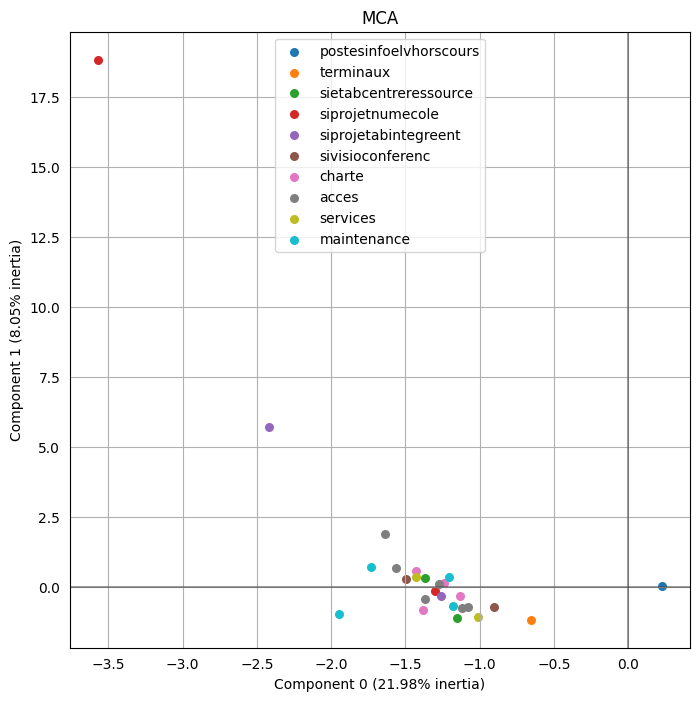

In [529]:
ax = mca.plot_coordinates(
    X=join,
    ax=None,
    figsize=(8, 8),
    show_row_points=False,
    row_points_size=10,
    show_row_labels=False,
    show_column_points=True,
    column_points_size=30,
    show_column_labels=False,
    legend_n_cols=1
)

ax.set_title('MCA')

_________________________

In [530]:
df_test = df.drop(columns=['Code_UAI', 'Millesime', 'Code_nature', 'nature_uai', 'typ_etab',
       'Academie', 'Departement', 'NbEleve', 'NbEnseignant',
        'NbRessourceEdit',
        'NbTerminaux', 'NbTablette', 'NbTablettePC',
       'NbMicroMoins5', 'NbMicroPortable', 'NbPortAffEl', 'NbPortAffEns',
       'NbEleveEqASH', 'NbPosteEqASH', 'NbTBI', 'propClassesAvecTBI',
       'NbVideoProj', 'NbClassMobile', 'NbLecteurMpx', 'NbImpr3D',
        'PostesInfoElvHorsCours',
       'SiPareFeuEtab', 'SiOuifiltrageWeb', 
       'ElvAuthentif', 'SiVisioConferenc', 'SiEntUtilise',
       'TypeMatHandi_Tablette', 'TypeMatHandi_OrdiPort', 'TypeMatHandi_LogApp',
       'TypeMatHandi_Autre', 'Code_region', 'Libelle_region'], inplace=False)

df_test = df_test.dropna()

KeyError: "['Code_UAI', 'Code_nature', 'nature_uai', 'NbRessourceEdit', 'NbTerminaux', 'NbTablette', 'NbTablettePC', 'NbMicroMoins5', 'NbMicroPortable', 'NbPortAffEl', 'NbPortAffEns', 'NbEleveEqASH', 'NbPosteEqASH', 'NbTBI', 'propClassesAvecTBI', 'NbVideoProj', 'NbClassMobile', 'NbLecteurMpx', 'NbImpr3D', 'SiPareFeuEtab', 'SiOuifiltrageWeb', 'ElvAuthentif', 'SiEntUtilise', 'TypeMatHandi_Tablette', 'TypeMatHandi_OrdiPort', 'TypeMatHandi_LogApp', 'TypeMatHandi_Autre'] not found in axis"

In [ ]:
mca_test = pc.MCA(
    n_components=2,
    n_iter=3,
    copy=True,
    check_input=True,
    engine='auto',
    random_state=42
)

mca_test = mca_test.fit(df_test)

Text(0.5, 1.0, 'ACM Général')

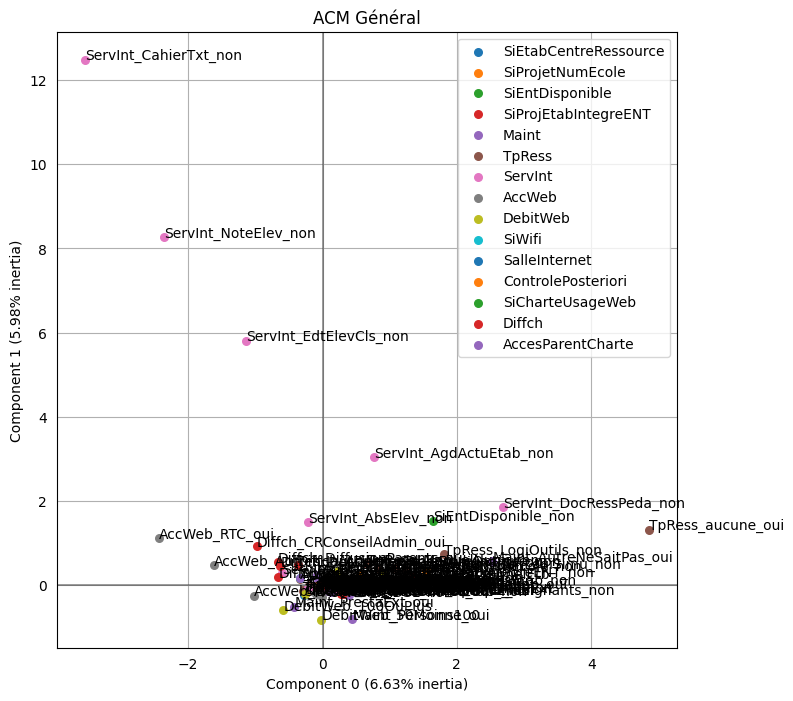

In [ ]:
ax2 = mca_test.plot_coordinates(
    X=df_test,
    ax=None,
    figsize=(8, 8),
    show_row_points=False,
    row_points_size=10,
    show_row_labels=False,
    show_column_points=True,
    column_points_size=30,
    show_column_labels=True,
    legend_n_cols=1
)

ax2.set_title('ACM Général')

Nous avons pu voir que seulement 12.61% de l'inertie est permise par ces axes, très peu d'informations est restitué. On va donc aller plus en profondeur


### Maintenance ACM

In [ ]:
#Suppression des colonnes inutiles
df_maintenance = df.drop(columns=['Code_UAI', 'Millesime', 'Code_nature', 'nature_uai', 'typ_etab',
       'Academie', 'Departement', 'NbEleve', 'NbEnseignant',
       'SiEtabCentreRessource', 'SiProjetNumEcole', 'SiEntDisponible',
       'SiProjEtabIntegreENT', 'NbRessourceEdit',
       'TpRess_ManuelNum', 'TpRess_AnimScienLogiSimu', 'TpRess_Bdd',
       'TpRess_LogiOutils', 'TpRess_OuvRef', 'TpRess_ResEntrainement',
       'TpRess_Autres', 'TpRess_aucune', 'ServInt_NoteElev', 'ServInt_AbsElev',
       'ServInt_EdtElevCls', 'ServInt_CahierTxt', 'ServInt_DocRessPeda',
       'ServInt_AgdActuEtab', 'ServInt_PlatApp', 'ServInt_Autres',
       'ServInt_aucun', 'NbTerminaux', 'NbTablette', 'NbTablettePC',
       'NbMicroMoins5', 'NbMicroPortable', 'NbPortAffEl', 'NbPortAffEns',
       'NbEleveEqASH', 'NbPosteEqASH', 'NbTBI', 'propClassesAvecTBI',
       'NbVideoProj', 'NbClassMobile', 'NbLecteurMpx', 'NbImpr3D',
       'AccWeb_RTC', 'AccWeb_CableFibreOptique', 'AccWeb_ADSL',
       'AccWeb_AutresHautDebit', 'AccWeb_NeSaitPas', 'AccWeb_Aucun',
       'DebitWeb', 'SiWifi', 'SalleInternet', 'PostesInfoElvHorsCours',
       'SiPareFeuEtab', 'SiOuifiltrageWeb', 'ControlePosteriori',
       'SiCharteUsageWeb', 'Diffch_AnnexeeRI',
       'Diffch_DossierRentreeEnseignants', 'Diffch_CRConseilAdmin',
       'Diffch_DiffusionParents', 'Diffch_Autres', 'AccesParentCharte',
       'ElvAuthentif', 'SiVisioConferenc', 'SiEntUtilise',
       'TypeMatHandi_Tablette', 'TypeMatHandi_OrdiPort', 'TypeMatHandi_LogApp',
       'TypeMatHandi_Autre', 'Code_region', 'Libelle_region'], inplace=False)


df_maintenance.dropna(inplace=True, axis=0)


On va vérifier que les colonnes sont bien supprimées

In [ ]:
print(df_maintenance.columns)
print(df_maintenance.shape)

Index(['Maint_PersCollect', 'Maint_PrestaExt', 'Maint_PersonnelEducNatHsEtab',
       'Maint_PersonnelEtab', 'Maint_AutreNeSaitPas', 'Maint_Personne'],
      dtype='object')
(881, 6)


Rennomage des colonnes

In [ ]:
old_columns = df_maintenance.columns

for column in old_columns:
    df_maintenance.rename(columns={column: column.replace('Maint_', '').lower()}, inplace=True)

df_maintenance.head()

,perscollect,prestaext,personneleducnathsetab,personneletab,autrenesaitpas,personne
0,oui,non,non,oui,non,non
1,oui,non,non,oui,non,non
2,non,non,non,oui,non,non
4,oui,non,non,oui,non,non
5,oui,non,non,oui,non,non


Nous allons chercher si il y a bien lien entre ces diffèrentes variables qualitatives à l'aide d'une ACM. Le but est de réduire le nombre de colonnes à prendre en compte dans notre formule et voir si il existe une corrélation entre ces variables

In [ ]:
mca = pc.MCA(
    n_components=2,
    n_iter=6,
    copy=True,
    check_input=True,
    engine='auto',
    random_state=42
)

mca = mca.fit(df_maintenance)

On va passer maintenant à la visualisation graphique de l'ACM pour analyser le résultat

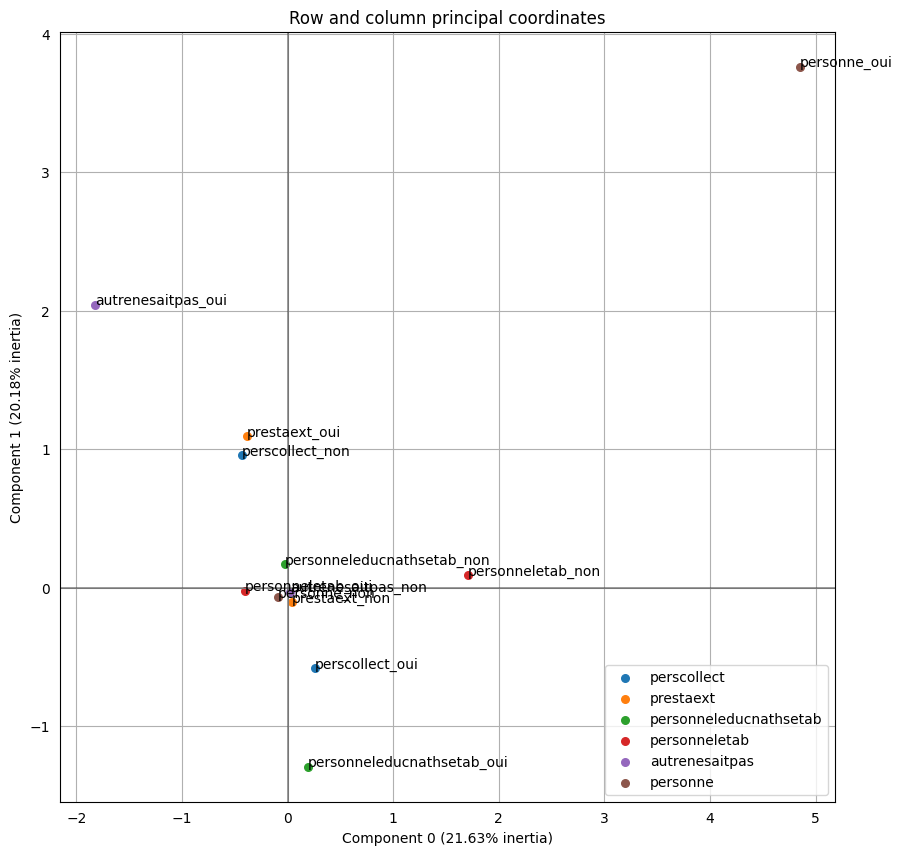

In [ ]:
ax = mca.plot_coordinates(
    X=df_maintenance,
    ax=None,
    figsize=(10, 10),
    show_row_points=False,
    row_points_size=10,
    show_row_labels=False,
    show_column_points=True,
    column_points_size=30,
    show_column_labels=True,
    legend_n_cols=1
)

On va supprimer les lignes qui contiennent une modalité "oui" pour personne

In [ ]:
df_maintenance = df_maintenance.loc[df_maintenance["personne"] != "oui"]
df_maintenance = df_maintenance.loc[df_maintenance["autrenesaitpas"] != "oui"]
df_maintenance = df_maintenance.loc[df_maintenance["prestaext"] != "oui"]
#df_maintenance = df_maintenance.loc[df_maintenance["personneleducnathsetab"] != "oui"]
#df_maintenance = df_maintenance.loc[df_maintenance["personneletab"] != "non"]

print(df_maintenance["personne"].value_counts())

non    775
Name: personne, dtype: int64


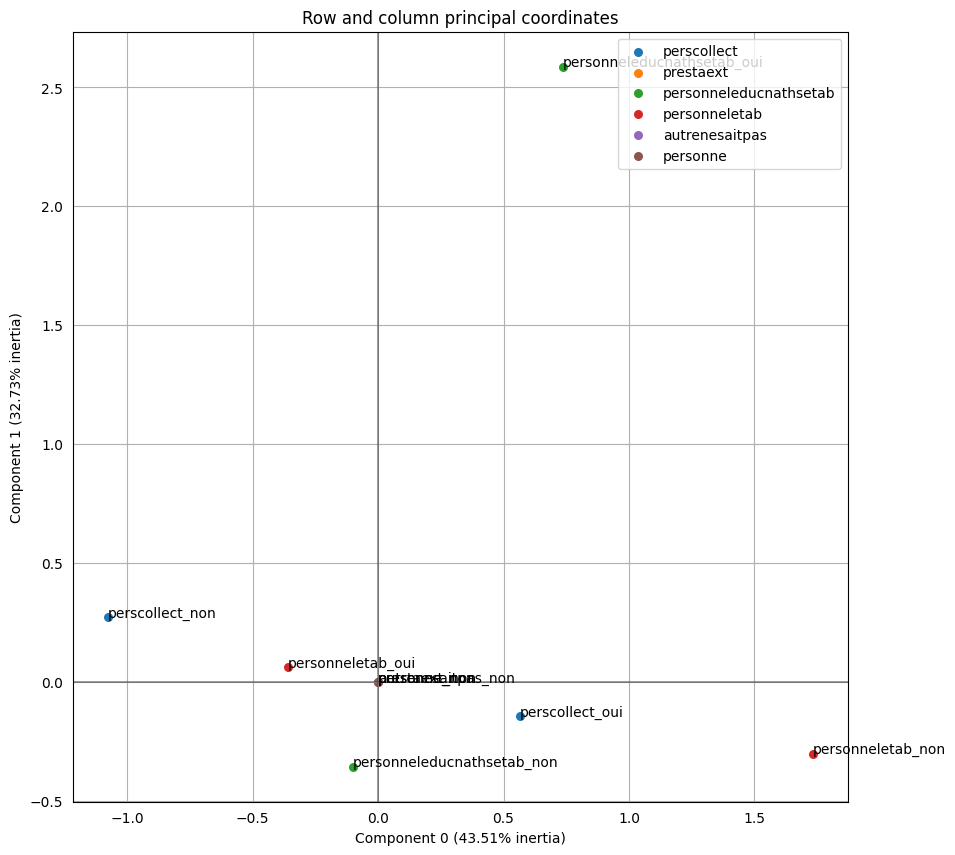

In [ ]:
mca3 = pc.MCA(
    n_components=2,
    n_iter=6,
    copy=True,
    check_input=True,
    engine='auto',
    random_state=42
)

mca3 = mca3.fit(df_maintenance)

ax3 = mca3.plot_coordinates(
    X=df_maintenance,
    ax=None,
    figsize=(10, 10),
    show_row_points=False,
    row_points_size=20,
    show_row_labels=False,
    show_column_points=True,
    column_points_size=30,
    show_column_labels=True,
    legend_n_cols=1
)

In [ ]:
mca.total_inertia_

1.0